In [1]:
# library imports

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# system settings
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

In [2]:
# dataset imports
train_df = pd.read_csv('./kaggle_datasets/house_prices/train.csv')
test_df = pd.read_csv('./kaggle_datasets/house_prices/test.csv')

In [3]:
train_df.shape

(1460, 81)

In [4]:
test_df.shape

(1459, 80)

In [5]:
# training set
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# testing set
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# training set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# testing set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Determine missing values

<AxesSubplot:>

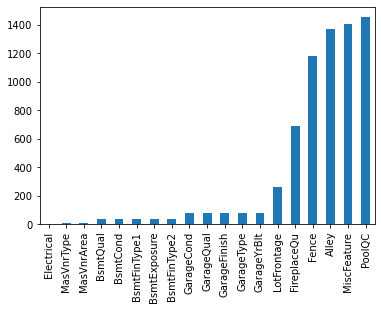

In [9]:
# training set
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
missing_train.plot.bar()

<AxesSubplot:>

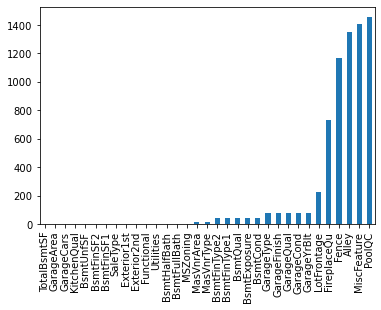

In [10]:
# testing set
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)
missing_test.plot.bar()

### Discussing missing values

For both datasets, similar values are missing at a high rate relative to the number of entries. These are mainly features describing the presence and quality of the garage, basement, pool, etc. on the property. It is important to determine if missing values are the result of the data publisher's encoding or if they are truly missing values. Before the missing data can be addressed, it is important to determine the distribution of the data and what methods make most sense for replacing null values.

### Find correlation between sales price and features

In [11]:
numeric_corr = train_df.select_dtypes(exclude='object').corr()
numeric_corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Within this dataset, the features that are most strongly correlated to sale price are the overall quality of the home, above ground living area, the size of garage in number of cars that can fit and in square foot, and the basement and first floor area in square feet. Both datasets have OverallQual and GrLivArea without null values, but the test dataset has null GarageArea and GarageCars at index 1116, and a null TotalBsmtSF at index 660. 

Looking further down the correlation table, LotFrontage has a mild correlation with sale price and is a feature that has numerous null values in both the training and testing dataset. For the other missing data, it is mostly categorical and will need to be addressed in other ways.

### Look for mostly-homogenous features

In [12]:
dataframe_list = []

for column in train_df:
    data_dict = {
        "feature": column,
        "observations": len(train_df[column]),
        "category count": train_df[column].nunique(),
        "top category": train_df.mode()[column][0],
        "top category percent": train_df[column].value_counts(normalize=True)[train_df.mode()[column][0]]
    }
    dataframe_list.append(data_dict)
    
feature_breakdown = pd.DataFrame(dataframe_list)
feature_breakdown.sort_values(by=['top category percent'], ascending=False, inplace=True)

In [13]:
feature_breakdown

,feature,observations,category count,top category,top category percent
9,Utilities,1460,2,AllPub,0.999315
5,Street,1460,2,Pave,0.995890
71,PoolArea,1460,8,0,0.995205
14,Condition2,1460,8,Norm,0.989726
69,3SsnPorch,1460,20,0,0.983562
22,RoofMatl,1460,8,CompShg,0.982192
45,LowQualFinSF,1460,24,0,0.982192
39,Heating,1460,6,GasA,0.978082
75,MiscVal,1460,21,0,0.964384
64,GarageCond,1460,5,TA,0.961566


In [14]:
# drop all columns with over 90% of values in one category
drop_features = ['Utilities', 'Street', 'PoolArea', 'Condition2', '3SsnPorch', 'RoofMatl', 'LowQualFinSF', 
                 'Heating', 'MiscVal', 'GarageCond', 'KitchenAbvGr', 'GarageQual', 'LandSlope', 'BsmtHalfBath',
                 'CentralAir', 'Functional', 'BsmtCond', 'ScreenPorch', 'PavedDrive', 'Electrical', 'MiscFeature']

for dataset in [train_df, test_df]:
        dataset.drop(drop_features, axis=1, inplace=True)

## Adressing Null Values

### Lot Frontage

Lot frontage is defined as the linear feet of street connected to the property. The first step in determining why null values exist in this feature is understanding whether it is a replacement for 0 or not.

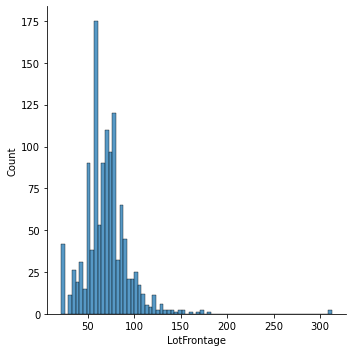

In [15]:
# view distplot

# training data
sns.displot(data=train_df, x='LotFrontage')

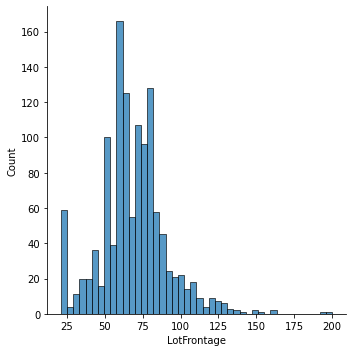

In [16]:
# training data
sns.displot(data=test_df, x='LotFrontage')

In [17]:
train_df[train_df['LotFrontage'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,NaN,IR1,Lvl,Corner,NWAmes,PosN,1Fam,2Story,7,6,1973,1973,Gable,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,Mn,ALQ,859,BLQ,32,216,1107,Ex,1107,983,2090,1,2,1,3,TA,7,2,TA,Attchd,1973.0,RFn,2,484,235,204,228,NaN,NaN,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,NaN,IR2,Lvl,Inside,Sawyer,Norm,1Fam,1Story,5,6,1962,1962,Hip,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,No,ALQ,737,Unf,0,175,912,TA,912,0,912,1,1,0,2,TA,4,0,NaN,Detchd,1962.0,Unf,1,352,140,0,0,NaN,NaN,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,NaN,IR1,Lvl,Corner,NAmes,Norm,1Fam,1Story,6,5,1960,1960,Hip,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,No,BLQ,733,Unf,0,520,1253,TA,1253,0,1253,1,1,1,2,TA,5,1,Fa,Attchd,1960.0,RFn,1,352,0,213,176,NaN,GdWo,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,NaN,IR1,Lvl,CulDSac,NAmes,Norm,1Fam,1Story,6,7,1970,1970,Gable,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,No,ALQ,578,Unf,0,426,1004,Ex,1004,0,1004,1,1,0,2,TA,5,1,TA,Attchd,1970.0,Fin,2,480,0,0,0,NaN,NaN,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,NaN,IR1,Lvl,Inside,Sawyer,Norm,1Fam,1Story,5,8,1968,2001,Gable,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,Mn,Rec,188,ALQ,668,204,1060,Ex,1060,0,1060,1,1,0,3,Gd,6,1,TA,Attchd,1968.0,Unf,1,270,406,90,0,NaN,MnPrv,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,NaN,IR1,Lvl,Corner,NWAmes,Norm,1Fam,1Story,6,7,1981,1981,Gable,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,No,BLQ,678,Unf,0,762,1440,Ex,1440,0,1440,0,2,0,3,Gd,7,1,TA,Attchd,1981.0,Fin,2,467,0,0,99,NaN,NaN,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,NaN,IR1,Lvl,Inside,NPkVill,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,No,LwQ,958,Unf,0,0,958,TA,958,0,958,0,2,0,2,TA,5,0,NaN,Attchd,1976.0,RFn,2,440,0,60,0,NaN,NaN,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,NaN,Reg,Lvl,Inside,CollgCr,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,Av,GLQ,697,Unf,0,151,848,Ex,848,0,848,1,1,0,1,Gd,3,1,TA,Attchd,2004.0,RFn,2,420,149,0,0,NaN,NaN,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,NaN,Reg,Lvl,Inside,BrkSide,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,No,Unf,0,Unf,0,952,952,Fa,952,0,952,0,1,0,2,Fa,4,1,Gd,Detchd,1916.0,Unf,1,192,0,98,0,NaN,NaN,5,2009,WD,Normal,121000


#### Hypothesis 1: Lot frontage has to do with LotConfig

The LotConfig variable describes where the lot is relative to the street. FR2 lots have frontage on 2 sides of the property, FR3 lots have frontage on 3 sides of the properts, CulDSac lots are situated on a cul-de-sac, and corner and inside lots are self-explanatory. Investigating if NaN values occur more frequently with certain LotConfigs could shed light on the subject.

In [18]:
# total lot config counts

# training data
train_df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [19]:
# testing data
test_df['LotConfig'].value_counts()

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64

In [20]:
# training data
train_df[train_df['LotFrontage'].isnull()]['LotConfig'].value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

In [21]:
# testing data
test_df[test_df['LotFrontage'].isnull()]['LotConfig'].value_counts()

Inside     137
Corner      42
CulDSac     38
FR2          6
FR3          4
Name: LotConfig, dtype: int64

On first glance, missing data seems proportional to the type of configuration; the configurations that are more heavily represented in the data have more missing values in the lot frontage feature. My initial idea was that null frontage values could correspond to a lot type that inherently lacked frontage, but that does not appear to be the case.

Discovering what lot frontage and configuration have in common could still prove valuable. Plotting the distributions of each type could discover if frontage and configuration are correlated enough to indicate a way to fill null values.

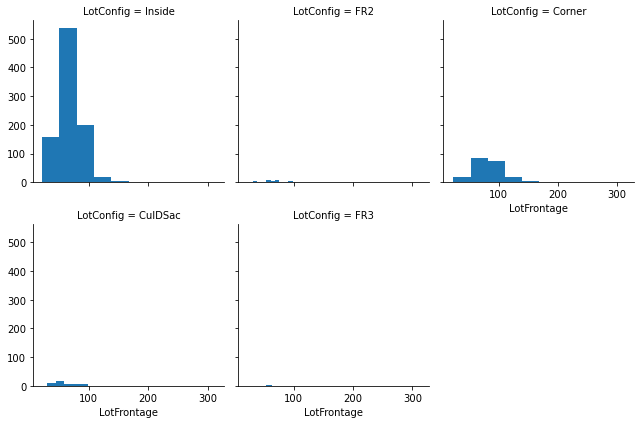

In [22]:
grid = sns.FacetGrid(train_df, col='LotConfig', col_wrap=3)
grid.map(plt.hist, 'LotFrontage')

In [23]:
# scale of plots is somewhat hard to read, a groupby table may help explain the distributions more clearly

train_df.groupby('LotConfig')['LotFrontage'].describe()

,count,mean,std,min,25%,50%,75%,max
LotConfig,,,,,,,,
Corner,201.0,84.039801,29.896294,24.0,61.0,80.0,97.00,313.0
CulDSac,45.0,59.911111,25.659326,30.0,44.0,50.0,72.00,168.0
FR2,33.0,63.515152,20.294890,24.0,57.0,64.0,70.00,98.0
FR3,4.0,70.750000,40.516458,35.0,53.0,59.5,77.25,129.0
Inside,918.0,67.715686,21.692025,21.0,59.0,68.0,79.00,313.0


There are obvious outliers in this data— lot frontages well beyond 3 standard deviations of the mean. That should be addressed immediately.

In [24]:
# eliminate data that has above 200' of footage
train_df.drop(train_df[train_df['LotFrontage'] > 200].index, inplace = True)

In [25]:
# check values after removing outliers
train_df.groupby('LotConfig')['LotFrontage'].describe()

,count,mean,std,min,25%,50%,75%,max
LotConfig,,,,,,,,
Corner,200.0,82.895000,25.170054,24.0,60.75,80.0,96.25,182.0
CulDSac,45.0,59.911111,25.659326,30.0,44.00,50.0,72.00,168.0
FR2,33.0,63.515152,20.294890,24.0,57.00,64.0,70.00,98.0
FR3,4.0,70.750000,40.516458,35.0,53.00,59.5,77.25,129.0
Inside,917.0,67.448201,20.132172,21.0,59.00,68.0,79.00,174.0


After adjusting for outliers, the data looks good. The means are relatively close, with FR3 and Corner lots possessing slightly higher mean frontage. I am satisfied with substituting null values with the averages for the lot config.

In [26]:
# replace null values with average of the config
train_df['LotFrontage'].fillna(train_df.groupby(['LotConfig'])['LotFrontage'].transform(np.mean), inplace=True)
test_df['LotFrontage'].fillna(test_df.groupby(['LotConfig'])['LotFrontage'].transform(np.mean), inplace=True)

In [27]:
# ensure no null values
print(train_df['LotFrontage'].isnull().sum(), test_df['LotFrontage'].isnull().sum())

0 0


In [28]:
# check correlation again
numeric_corr = train_df.select_dtypes(exclude='object').corr()
numeric_corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.793610
GrLivArea        0.725438
TotalBsmtSF      0.646750
GarageCars       0.640489
GarageArea       0.628521
1stFlrSF         0.625772
FullBath         0.560757
TotRmsAbvGrd     0.536175
YearBuilt        0.523722
YearRemodAdd     0.507271
GarageYrBlt      0.487491
MasVnrArea       0.481079
Fireplaces       0.469658
BsmtFinSF1       0.407161
LotFrontage      0.357360
WoodDeckSF       0.325220
2ndFlrSF         0.320353
OpenPorchSF      0.318522
HalfBath         0.284999
LotArea          0.266865
BsmtFullBath     0.227954
BsmtUnfSF        0.215039
BedroomAbvGr     0.167661
MoSold           0.045282
BsmtFinSF2      -0.011281
Id              -0.021950
YrSold          -0.028978
OverallCond     -0.078693
MSSubClass      -0.083852
EnclosedPorch   -0.128494
Name: SalePrice, dtype: float64

Replacing the missing data has not meaningfully adjusted the correlation between Lot Frontage and Sale Price, but it has ensured that the data is more complete.

<AxesSubplot:>

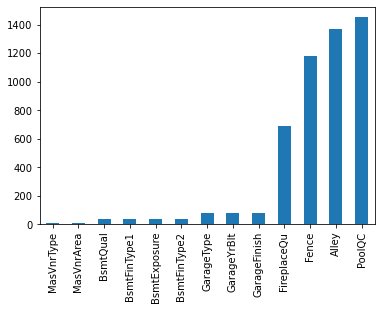

In [29]:
# check missing values chart again

# training set
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
missing_train.plot.bar()

<AxesSubplot:>

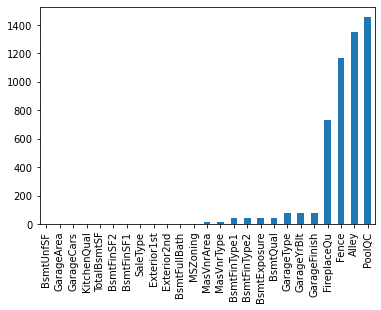

In [30]:
# testing set
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)
missing_test.plot.bar()

### PoolQC

PoolQC, or Pool Quality, is a feature that explains whether the pool on the property is in Ex (Excellent), Gd (Good), TA (Typical/average), Fa (Fair), or NA (No Pool) shape. While the presence of a pool may have an impact on the house price, there are too few data points including them to get meaningful insight on their influence. 

In [31]:
# drop the PoolQC feature
train_df.drop(['PoolQC'], axis=1, inplace=True)
test_df.drop(['PoolQC'], axis=1, inplace=True)

<AxesSubplot:>

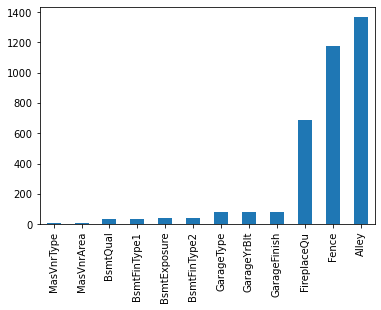

In [32]:
# check missing values chart again

# training set
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
missing_train.plot.bar()

<AxesSubplot:>

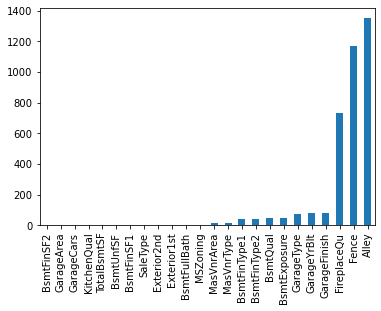

In [33]:
# testing set
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)
missing_test.plot.bar()

### Alley

Alleys are an extremely rare feature in this dataset and will be dropped. Depending on the type of alley being described, [they may decrease property values](https://canadianrealestatenetwork.com/whats-an-alleyway-home-and-is-it-worth-it-to-invest-in-one/), but a lack of clarification in the data as well as a lack of data points makes it hard to infer. For the time being, the data will be dropped.

In [34]:
# drop the PoolQC feature
train_df.drop(['Alley'], axis=1, inplace=True)
test_df.drop(['Alley'], axis=1, inplace=True)

### Fence

The fence variable describes the quality of fence on the property rather than whether a fence exists on the property or not. While quality potentially has an affect on prices, there could be too few data points based on different qualities that it would not offer enough insight.  

In [35]:
# observe distribution
train_df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

The majority of fences in this dataset are either minimum privacy or minimum wood/wire. This suggests to me that the fences may not add considerable value to properties compared to those without fences. Condensing the fences into a binary yes/no variable could illuminate whether fences influence selling price.

In [36]:
# create the binary feature
train_df['FenceExists'] = np.where(train_df['Fence'].isnull(), 0, 1)

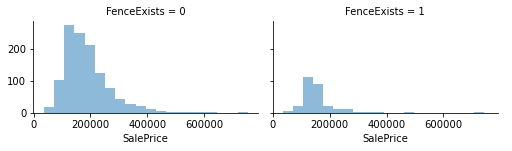

In [37]:
# test if fences have a meaningful difference in price with/without 
grid = sns.FacetGrid(train_df, col='FenceExists', height=2.2, aspect=1.6) 
grid.map(plt.hist, 'SalePrice', alpha=.5, bins=20) 
grid.add_legend()

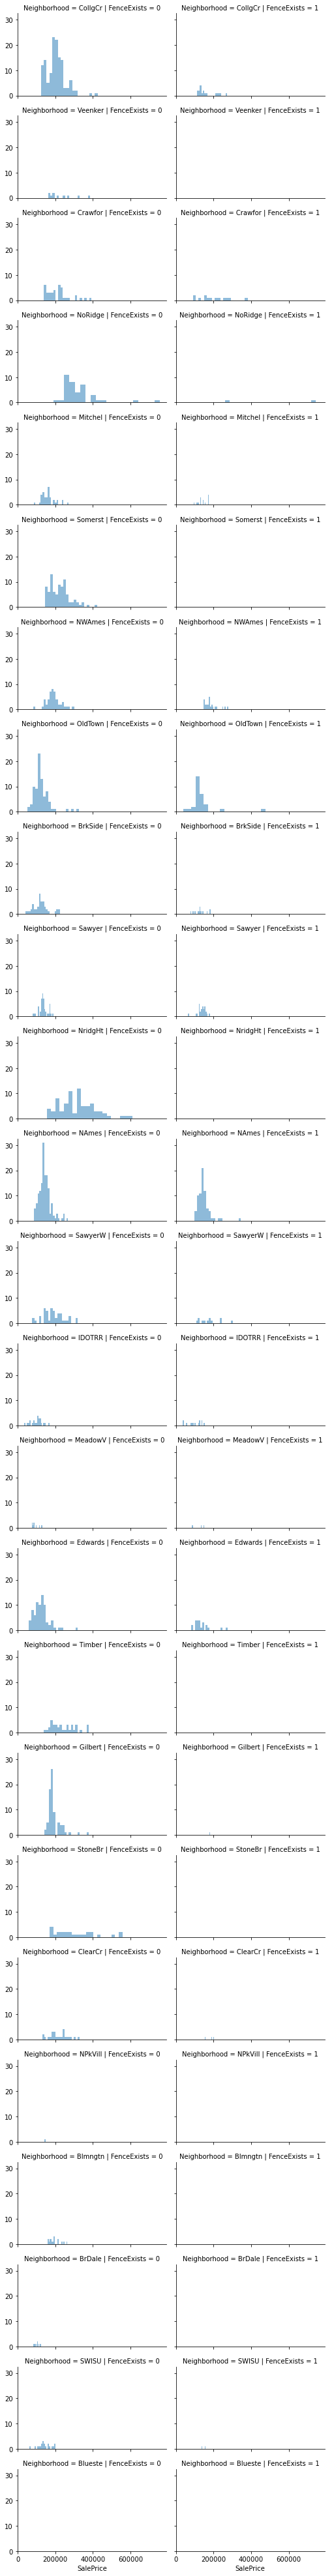

In [38]:
# test if fences have a meaningful difference in price with/without on the neighborhood level 
grid = sns.FacetGrid(train_df, col='FenceExists', row='Neighborhood', height=2.2, aspect=1.6) 
grid.map(plt.hist, 'SalePrice', alpha=.5, bins=20) 
grid.add_legend()

While the presence of fences is correlated to lower sales price per the overall data, this is likely the result of the sample size of fenced properties being so small and lacking the range that non-fenced properties have in house prices. At the neighborhood level, the lack of influence on sale prices can be seen for most neighborhoods. Because of this, the variable will be dropped.

In [39]:
# drop the fence feature
train_df.drop(['Fence'], axis=1, inplace=True)
test_df.drop(['Fence'], axis=1, inplace=True)

train_df.drop(['FenceExists'], axis=1, inplace=True)

<AxesSubplot:>

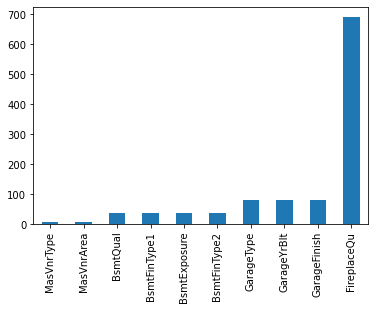

In [40]:
# check missing values chart again

# training set
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
missing_train.plot.bar()

<AxesSubplot:>

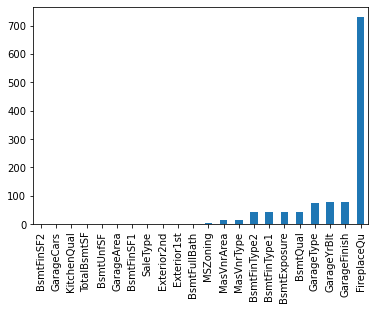

In [41]:
# testing set
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)
missing_test.plot.bar()

### FireplaceQu 

Fireplace quality is a measure of what type of fireplace a property has. The dataset also has a "Fireplaces" feature with the number of fireplaces listed. Determining what the data for both categories looks like could suggest what to do with the missing values in the FireplaceQu column.

<AxesSubplot:xlabel='Fireplaces', ylabel='count'>

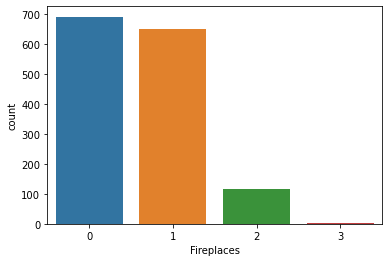

In [42]:
# Get distribution of "Fireplaces" feature
sns.countplot(x='Fireplaces', data=train_df)

In this dataset, around half of properties do not have a fireplace, around half of properties do have a fireplace, and a small segment have 2 or 3 fireplaces. This suggests that the missing values in fireplace quality are likely just properties without a fireplace and the encoding is read as a null value rather than "NA".

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

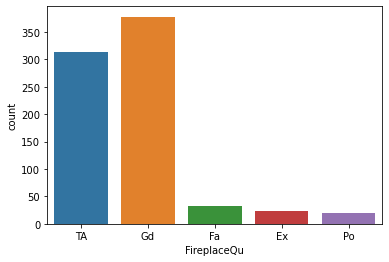

In [43]:
# Get distribution of "Fireplaces" feature
sns.countplot(x='FireplaceQu', data=train_df)

A majority of properties with a fireplace have either a good or average fireplace with a smaller number of homes having excellent, fair, or poor quality ones. My hypothesis is that there is a larger change in price with or without fireplaces than between fireplaces of different qualities.

In [44]:
# create a binary yes/no variable to check if a property has a fireplace
train_df['FireplaceBin'] = np.where(train_df['Fireplaces'] >= 1, 1, 0)

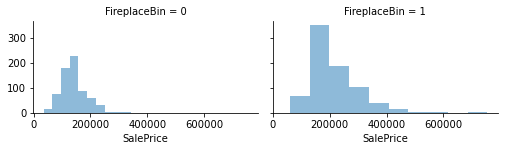

In [45]:
# test if fireplacess have a meaningful difference in price with/without 
grid = sns.FacetGrid(train_df, col='FireplaceBin', height=2.2, aspect=1.6) 
grid.map(plt.hist, 'SalePrice', alpha=.5) 
grid.add_legend()

In [46]:
train_df['FireplaceBin'].value_counts()

1    768
0    690
Name: FireplaceBin, dtype: int64

In [47]:
# fill in fireplace quality nans with filler label
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna("NA")

In this dataset, roughly one half of homes have at least one fireplace and roughly one half do not have a fireplace. When looking at the distribution of sale price for both categories, there is a clear correlation — homes with fireplaces have higher sales prices.

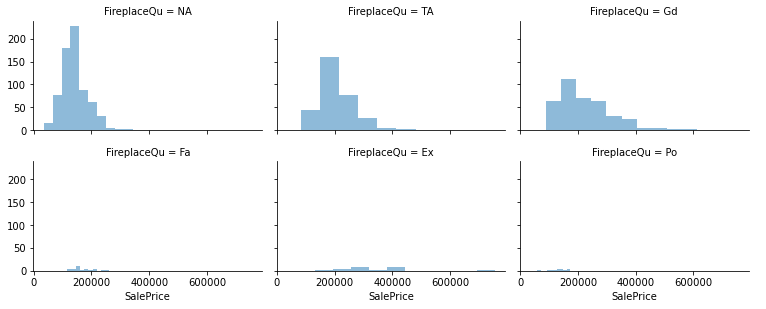

In [48]:
# test if fireplacess have a meaningful difference in price with/without 
grid = sns.FacetGrid(train_df, col='FireplaceQu', height=2.2, aspect=1.6, col_wrap=3) 
grid.map(plt.hist, 'SalePrice', alpha=.5) 
grid.add_legend()

When looking at the data broken down by fireplace quality, a similar pattern can be seen — properties without fireplaces have lower sale prices on average compared to homes with fireplaces. Homes with fireplaces in good condition seem to have higher sales prices on average, but there are too few datapoints outside of average and nan fireplaces to get a good idea of what the influence of fireplace quality is on prices. Because of this, I will elect to utilize the binary value instead for classification.

In [49]:
# create a binary yes/no variable to check if a property has a fireplace
test_df['FireplaceBin'] = np.where(test_df['Fireplaces'] >= 1, 1, 0)

# drop fireplaces and fireplacequ
train_df.drop(['Fireplaces', 'FireplaceQu'], axis=1, inplace=True)
test_df.drop(['Fireplaces', 'FireplaceQu'], axis=1, inplace=True)

<AxesSubplot:>

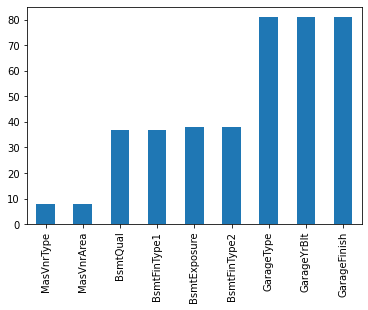

In [50]:
# check missing values chart again

# training set
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
missing_train.plot.bar()

<AxesSubplot:>

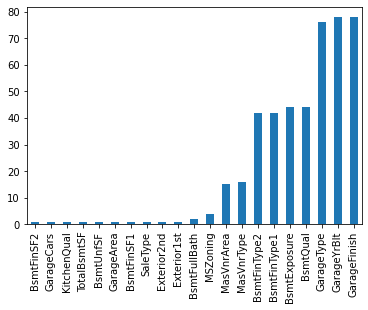

In [51]:
# testing set
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)
missing_test.plot.bar()

### GarageFinish

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

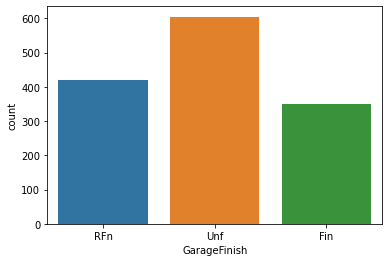

In [52]:
# Get distribution of "Fireplaces" feature
sns.countplot(x='GarageFinish', data=train_df)

Unlike GarageCond, GarageFinish has three robust variables that may have a link to sale prices.

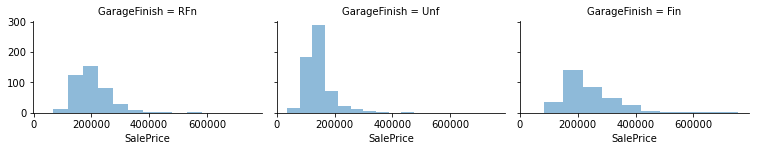

In [53]:
# test if fireplacess have a meaningful difference in price with/without 
grid = sns.FacetGrid(train_df, col='GarageFinish', height=2.2, aspect=1.6, col_wrap=3) 
grid.map(plt.hist, 'SalePrice', alpha=.5) 
grid.add_legend()

In [54]:
train_df.groupby(['GarageFinish'])['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
GarageFinish,,,,,,,,
Fin,351.0,240280.760684,97004.410647,82500.0,176000.0,215000.0,284231.5,755000.0
RFn,421.0,201974.021378,63581.897490,68400.0,158000.0,190000.0,232000.0,582933.0
Unf,605.0,142156.423140,46498.528211,35311.0,116000.0,135000.0,157000.0,475000.0


On average, properties with finished garages have the highest sale prices, properties with unfinished garages have the lowest sales prices, and rough finished garages are in the middle. This category may provide meaningful insight on sale price. 

In [55]:
# ensure that missing values are filled in
train_df['GarageFinish'].fillna('NA', inplace=True)
test_df['GarageFinish'].fillna('NA', inplace=True)

### GarageYrBlt

Garage year built is a factor that gives the year that a garage was built. This feature heavily correlates with the year the house itself was built, but there may be correlation between garage year built and sales price.

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

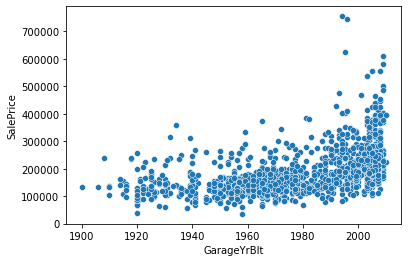

In [56]:
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=train_df)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

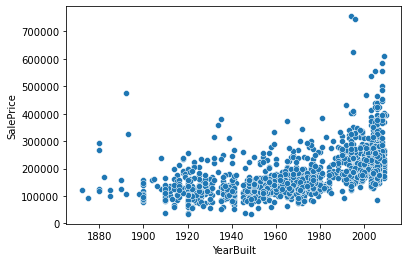

In [57]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_df)

In general, there does not seem to be a distinct difference between the charts because most garages were built when the houses were built and most properties in the dataset have a garage. At the moment, changes to the data do not appear necessary. Missing values will currently be substituted with the year the house itself was built. This may be changed in a later iteration of the project. 

In [58]:
train_df['GarageYrBlt'].fillna(train_df['YearBuilt'], inplace=True)
test_df['GarageYrBlt'].fillna(test_df['YearBuilt'], inplace=True)

<AxesSubplot:>

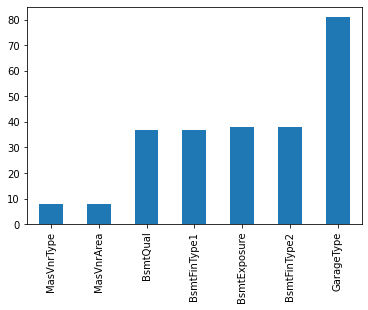

In [59]:
# check missing values chart again

# training set
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
missing_train.plot.bar()

### GarageType

GarageType describes the location of the garage in relation to the house. This has the potential to be very helpful in predicting sales price if there are robust categories with sizable samples of each type.

In [60]:
# missing data can be replaced by "NAN" values
train_df['GarageType'].fillna("NA", inplace=True)
test_df['GarageType'].fillna("NA", inplace=True)

<AxesSubplot:xlabel='GarageType', ylabel='count'>

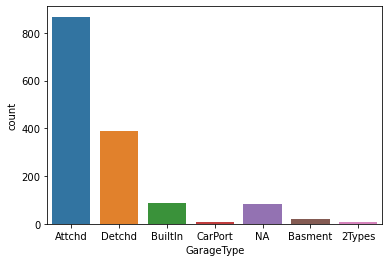

In [61]:
# Get distribution of "Fireplaces" feature
sns.countplot(x='GarageType', data=train_df)

While there are far more attached garages than detached garages, there should be enough data points to observe if there is a correlation between type of garage and sale price.

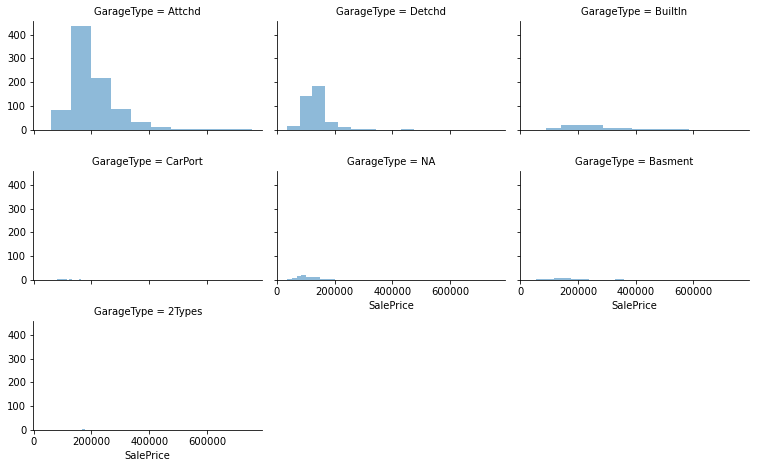

In [62]:
# test if fireplacess have a meaningful difference in price with/without 
grid = sns.FacetGrid(train_df, col='GarageType', height=2.2, aspect=1.6, col_wrap=3) 
grid.map(plt.hist, 'SalePrice', alpha=.5) 
grid.add_legend()

In [63]:
train_df.groupby(['GarageType'])['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
GarageType,,,,,,,,
2Types,6.0,151283.333333,34917.068415,87000.0,146250.0,159000.0,170250.00,186700.0
Attchd,868.0,202897.017281,77210.390583,60000.0,149975.0,185000.0,235000.00,755000.0
Basment,19.0,160570.684211,63967.283574,55993.0,132250.0,148000.0,174000.00,359100.0
BuiltIn,88.0,254751.738636,102230.854394,91000.0,180750.0,227500.0,300719.25,582933.0
CarPort,9.0,109962.111111,24638.183681,82000.0,95000.0,108000.0,110000.00,164900.0
Detchd,387.0,134091.162791,41391.549953,35311.0,110000.0,129500.0,147700.00,475000.0
NA,81.0,103317.283951,32815.023389,34900.0,82500.0,100000.0,124000.00,200500.0


On average, homes without garages have lower sale prices than those with garages with any configuration. On average, built in garages are associated with the highest sale prices, but there are few instances of the category. When looking at the most populous categories, attached garages typically have higher sale prices than detached garages. This variable seems like a strong indicator of sale price.

<AxesSubplot:>

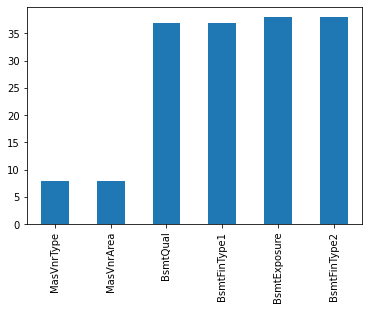

In [64]:
# check missing values chart again

# training set
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
missing_train.plot.bar()

### Basement features

For the basement features, missing values are those where a basement is not present. Replacing the missing values with "None" can quickly fix the data.

In [65]:
for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual']:
    train_df[col].fillna('NA', inplace=True)
    test_df[col].fillna('NA', inplace=True)

### BsmtFullBath

In the test dataset, there are two missing datapoints for the number of full bathrooms in the basement. Determining why they're missing will suggest how to replace missing values

In [66]:
test_df[test_df['BsmtFullBath'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,FireplaceBin
660,2121,20,RM,99.0,5940,IR1,Lvl,FR3,BrkSide,Feedr,1Fam,1Story,4,7,1946,1950,Gable,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NaN,NA,NaN,NaN,NaN,TA,896,0,896,NaN,1,0,2,TA,4,Detchd,1946.0,Unf,1.0,280.0,0,0,0,4,2008,ConLD,Abnorml,0
728,2189,20,RL,123.0,47007,IR1,Lvl,Inside,Edwards,Norm,1Fam,1Story,5,7,1959,1996,Gable,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,0.0,NA,0.0,0.0,0.0,TA,3820,0,3820,NaN,3,1,5,Ex,11,Attchd,1959.0,Unf,2.0,624.0,0,372,0,7,2008,WD,Normal,1


In [67]:
for dataset in [train_df, test_df]:
    dataset['BsmtFullBath'].fillna(0, inplace=True)

### Masonry

Masonry veneer type and masonry veneer area are very likely related in regard to missing values — if the type is missing, the area is probably missing. That will be investigated now.

In [68]:
train_df[train_df['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,FireplaceBin
234,235,60,RL,67.448201,7851,Reg,Lvl,Inside,Gilbert,Norm,1Fam,2Story,6,5,2002,2002,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,GLQ,625,Unf,0,235,860,Ex,860,1100,1960,1,2,1,4,Gd,8,BuiltIn,2002.0,Fin,2,440,288,48,0,5,2010,WD,Normal,216500,1
529,530,20,RL,59.911111,32668,IR1,Lvl,CulDSac,Crawfor,Norm,1Fam,1Story,6,3,1957,1975,Hip,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,No,Rec,1219,Unf,0,816,2035,TA,2515,0,2515,1,3,0,4,TA,9,Attchd,1975.0,RFn,2,484,0,0,200,3,2007,WD,Alloca,200624,1
650,651,60,FV,65.000000,8125,Reg,Lvl,Inside,Somerst,Norm,1Fam,2Story,7,6,2007,2007,Gable,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,No,Unf,0,Unf,0,813,813,Ex,822,843,1665,0,2,1,3,Gd,7,Attchd,2007.0,RFn,2,562,0,0,0,5,2008,WD,Normal,205950,0
936,937,20,RL,67.000000,10083,Reg,Lvl,Inside,SawyerW,Norm,1Fam,1Story,7,5,2003,2003,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,GLQ,833,Unf,0,343,1176,Ex,1200,0,1200,1,2,0,2,Gd,5,Attchd,2003.0,RFn,2,555,0,41,0,8,2009,WD,Normal,184900,0
973,974,20,FV,95.000000,11639,Reg,Lvl,Corner,Somerst,Norm,1Fam,1Story,7,5,2007,2008,Gable,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,No,Unf,0,Unf,0,1428,1428,Ex,1428,0,1428,0,2,0,3,Gd,6,Attchd,2007.0,Fin,2,480,0,120,0,12,2008,New,Partial,182000,0
977,978,120,FV,35.000000,4274,IR1,Lvl,Inside,Somerst,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,GLQ,1106,Unf,0,135,1241,Ex,1241,0,1241,1,1,1,1,Gd,4,Attchd,2007.0,Fin,2,569,0,116,0,11,2007,New,Partial,199900,0
1243,1244,20,RL,107.000000,13891,Reg,Lvl,Inside,NridgHt,Norm,1Fam,1Story,10,5,2006,2006,Gable,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,GLQ,1386,Unf,0,690,2076,Ex,2076,0,2076,1,2,1,2,Ex,7,Attchd,2006.0,Fin,3,850,216,229,0,9,2006,New,Partial,465000,1
1278,1279,60,RL,75.000000,9473,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,8,5,2002,2002,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,GLQ,804,Unf,0,324,1128,Ex,1128,903,2031,1,2,1,3,Gd,7,Attchd,2002.0,RFn,2,577,0,211,0,3,2008,WD,Normal,237000,1


In [69]:
test_df[test_df['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,FireplaceBin
231,1692,60,RL,81.373786,12891,IR1,Lvl,Corner,Gilbert,Norm,1Fam,2Story,8,5,2002,2002,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,No,GLQ,651.0,Unf,0.0,219.0,870.0,Ex,878,1126,2004,1.0,2,1,4,Gd,8,BuiltIn,2002.0,Fin,3.0,644.0,0,48,0,7,2009,WD,Normal,1
246,1707,20,FV,90.000000,7993,IR1,Lvl,Inside,Somerst,Norm,1Fam,1Story,7,5,2008,2009,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,No,Unf,0.0,Unf,0.0,1436.0,1436.0,Ex,1436,0,1436,0.0,2,0,3,Gd,6,Attchd,2008.0,Fin,2.0,529.0,0,121,0,10,2009,New,Partial,0
422,1883,60,RL,70.000000,8749,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2002,2002,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,Unf,0.0,Unf,0.0,840.0,840.0,Ex,840,885,1725,0.0,2,1,3,Gd,6,Attchd,2002.0,RFn,2.0,550.0,0,48,0,11,2009,WD,Normal,0
532,1993,60,RL,66.709746,7750,Reg,Lvl,Inside,Gilbert,RRAn,1Fam,2Story,7,5,2002,2002,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,Unf,0.0,Unf,0.0,707.0,707.0,Ex,707,707,1414,0.0,2,1,3,Gd,6,Attchd,2002.0,Fin,2.0,403.0,100,35,0,4,2008,WD,Normal,1
544,2005,20,RL,87.000000,10037,Reg,Lvl,Corner,Somerst,Feedr,1Fam,1Story,8,5,2006,2007,Hip,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,No,GLQ,666.0,Unf,0.0,794.0,1460.0,Ex,1460,0,1460,0.0,2,0,3,Gd,6,Attchd,2006.0,Fin,2.0,480.0,0,20,0,8,2008,WD,Normal,1
581,2042,60,FV,66.709746,7500,Reg,Lvl,Inside,Somerst,Norm,1Fam,2Story,7,5,2002,2002,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,Unf,0.0,Unf,0.0,952.0,952.0,Ex,952,860,1812,0.0,2,1,3,TA,7,Attchd,2002.0,RFn,2.0,469.0,144,112,0,4,2008,WD,Normal,1
851,2312,60,RL,59.000000,15810,IR1,Lvl,Inside,Gilbert,RRAn,1Fam,2Story,6,5,2007,2007,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,CBlock,Gd,No,Unf,0.0,Unf,0.0,768.0,768.0,Ex,768,728,1496,0.0,3,0,3,Gd,7,Attchd,2007.0,Unf,2.0,572.0,100,0,0,5,2007,New,Partial,0
865,2326,80,RL,81.373786,11950,IR1,Lvl,Corner,Gilbert,Norm,1Fam,SLvl,7,5,2003,2003,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,Unf,0.0,Unf,0.0,384.0,384.0,Ex,754,640,1394,0.0,2,1,3,Gd,7,BuiltIn,2003.0,Fin,2.0,400.0,100,0,0,10,2007,WD,Normal,1
880,2341,20,RL,85.000000,9965,Reg,Lvl,FR2,Somerst,Feedr,1Fam,1Story,7,5,2007,2007,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,Unf,0.0,Unf,0.0,1528.0,1528.0,Ex,1528,0,1528,0.0,3,2,3,Gd,6,Attchd,2007.0,Unf,2.0,480.0,0,228,0,9,2007,New,Partial,1
889,2350,60,FV,112.000000,12217,IR1,Lvl,Inside,Somerst,Norm,1Fam,2Story,8,5,2007,2007,Hip,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,Av,GLQ,745.0,Unf,0.0,210.0,955.0,Ex,955,925,1880,1.0,2,1,3,Ex,8,Attchd,2007.0,Fin,3.0,880.0,168,127,0,12,2007,New,Partial,1


For both datasets, the rows where masonry veneer type is missing, the masonry veneer area is missing. That means that they can both be filled with None/0 values.

In [70]:
for dataset in [train_df, test_df]:
    dataset['MasVnrType'].fillna('None', inplace=True)
    dataset['MasVnrArea'].fillna(0, inplace=True)

### MSZoning

This feature describes the type of zoning that the property is situated on. Determining whether the zoning feature is dominated by a single category or if there are features that are heavily correlated to zoning can help fill in the missing values.

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

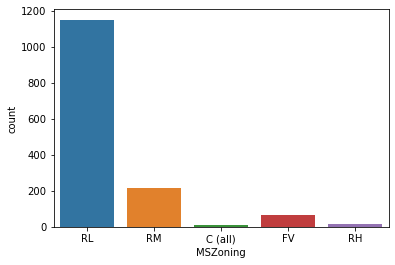

In [71]:
sns.countplot(x='MSZoning', data=train_df)

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

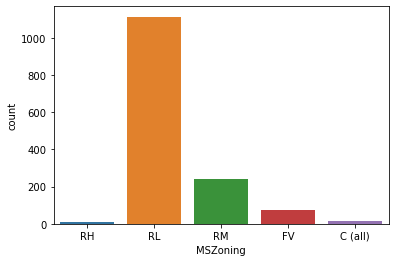

In [72]:
sns.countplot(x='MSZoning', data=test_df)

For both datasets, the RL (residential low density) zoning is the majority of all properties. While this may suggest that using the mode may be easiest, determining whether there is a correlating feature will produce the best insights. 

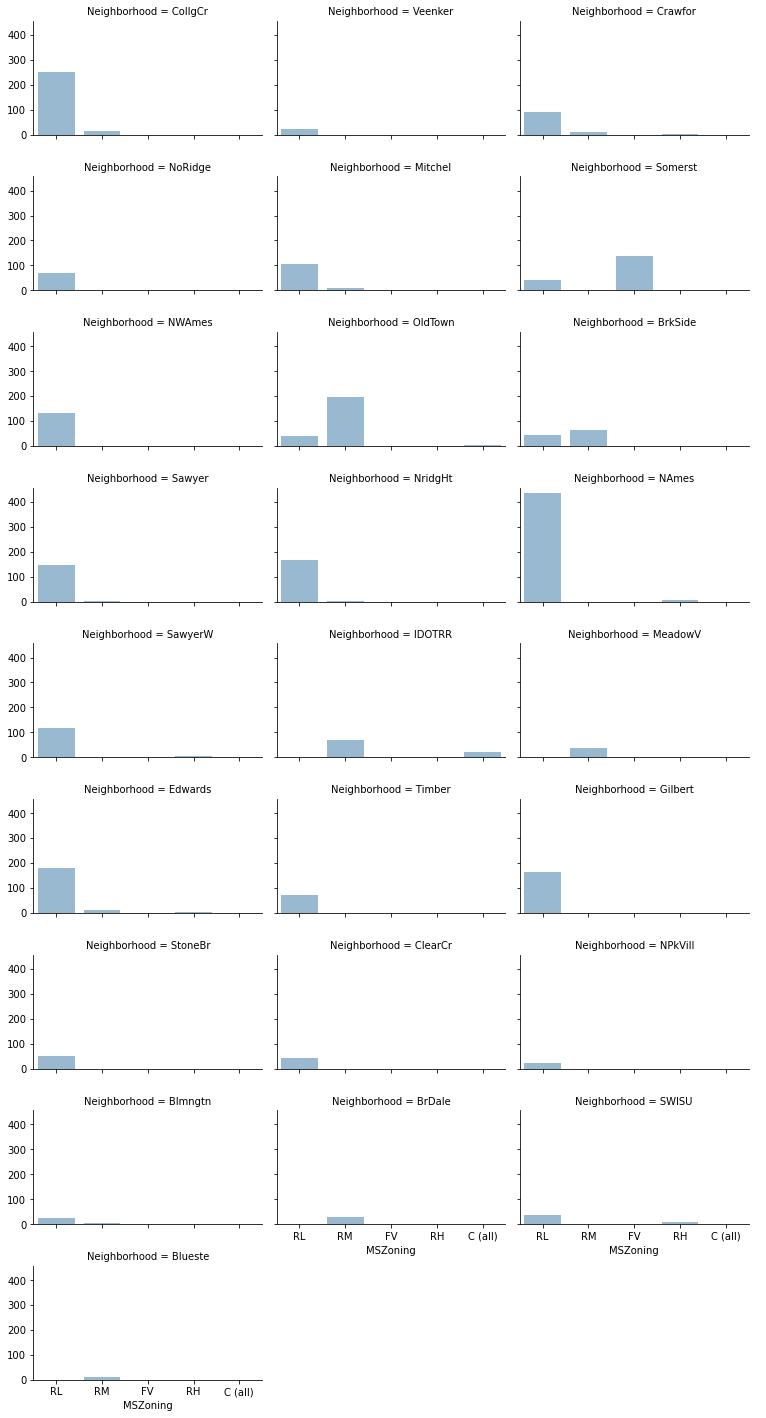

In [73]:
# see if neighborhood correlates to zoning
# create a combined df to see patterns
frames = [train_df, test_df]
comb_df = pd.concat(frames)

grid = sns.FacetGrid(comb_df, col='Neighborhood', height=2.2, aspect=1.6, col_wrap=3) 
grid.map(sns.countplot, 'MSZoning', order=comb_df['MSZoning'].value_counts().index, alpha=.5) 
grid.add_legend()

In the test dataset, rows are from the neighborhood "IDOTRR" while one is from Mitchel. In both the test and training dataset, "IDOTRR" only features RM and C zones, suggesting that there may be a restriction placed by the local government. In Mitchel, most properties are RL. Assigning these values should be sufficient. 

In [74]:
# get missing values indexes
test_df[test_df['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,FireplaceBin
455,1916,30,NaN,109.000000,21780,Reg,Lvl,Inside,IDOTRR,Norm,1Fam,1Story,2,4,1910,1950,Gable,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NA,NA,NA,0.0,NA,0.0,0.0,0.0,TA,810,0,810,0.0,1,0,1,TA,4,Detchd,1975.0,Unf,1.0,280.0,119,24,0,3,2009,ConLD,Normal,0
756,2217,20,NaN,80.000000,14584,Reg,Low,Inside,IDOTRR,Norm,1Fam,1Story,1,5,1952,1952,Gable,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NA,NA,NA,0.0,NA,0.0,0.0,0.0,Po,733,0,733,0.0,1,0,2,Fa,4,Attchd,1952.0,Unf,2.0,487.0,0,0,0,2,2008,WD,Abnorml,0
790,2251,70,NaN,66.709746,56600,IR1,Low,Inside,IDOTRR,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,Ex,1150,686,1836,0.0,2,0,4,TA,7,Detchd,1900.0,Unf,1.0,288.0,0,0,0,1,2008,WD,Normal,0
1444,2905,20,NaN,125.000000,31250,Reg,Lvl,Inside,Mitchel,Artery,1Fam,1Story,1,3,1951,1951,Gable,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NA,NA,NA,0.0,NA,0.0,0.0,0.0,TA,1600,0,1600,0.0,1,1,3,TA,6,Attchd,1951.0,Unf,1.0,270.0,0,0,135,5,2006,WD,Normal,0


In [75]:
test_df.loc[455, 'MSZoning'] = 'RM'
test_df.loc[756, 'MSZoning'] = 'RM'
test_df.loc[790, 'MSZoning'] = 'RM'
test_df.loc[1444, 'MSZoning'] = 'RL'

### SaleType

<AxesSubplot:xlabel='SaleType', ylabel='count'>

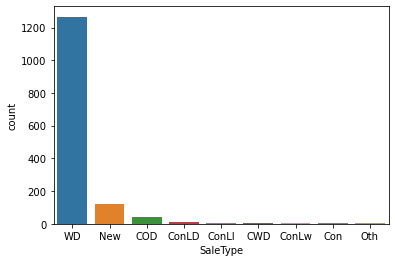

In [76]:
sns.countplot(x='SaleType', data=train_df)

<AxesSubplot:xlabel='SaleType', ylabel='count'>

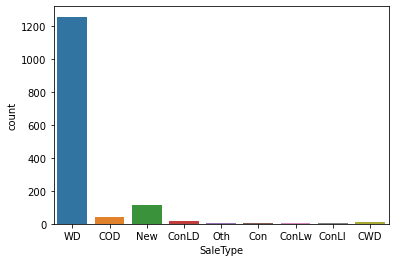

In [77]:
sns.countplot(x='SaleType', data=test_df)

The most popular sale types are:

Warranty Deed Conventional (WD) — the typical transfer of a home where the buyer uses a standard loan to fund the transaction

New — the house is constructed and purchased for the buyer

Court Officer Deed (COD) — A transfer of a home from an estate to an individual

It can be assumed that a missing value for sale type is likely a WD, but if the year built and year bought are equal, it is likely a New.

In [78]:
# check to see if the years are equal
test_df[test_df['SaleType'].isnull()][['YrSold', 'YearBuilt']]

,YrSold,YearBuilt
1029,2007,1958


Because they are not equal, the sale can be assumed to be a WD. The missing value can be filled in.

In [79]:
test_df.loc[1029, 'SaleType'] = 'WD'

### Garage Area
Size of garage in square feet

In [80]:
test_df[test_df['GarageArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,FireplaceBin
1116,2577,70,RM,50.0,9060,Reg,Lvl,Inside,IDOTRR,Norm,1Fam,2Story,5,6,1923,1999,Gable,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,No,ALQ,548.0,Unf,0.0,311.0,859.0,Ex,942,886,1828,0.0,2,0,3,Gd,6,Detchd,1923.0,NA,NaN,NaN,174,0,212,3,2007,WD,Alloca,0


In this situation, there is a garage on the property, but the area of the garage is not listed. Looking at the distribution of garage area for each type of garage may offer an estimate for the missing value.

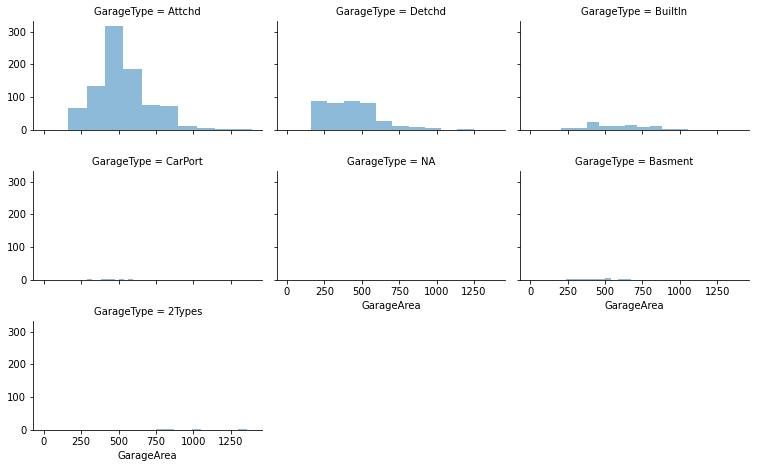

In [81]:
# test if fireplacess have a meaningful difference in price with/without 
grid = sns.FacetGrid(train_df, col='GarageType', height=2.2, aspect=1.6, col_wrap=3) 
grid.map(plt.hist, 'GarageArea', alpha=.5) 
grid.add_legend()

In [82]:
train_df.groupby(['GarageType'])['GarageArea'].describe()

,count,mean,std,min,25%,50%,75%,max
GarageType,,,,,,,,
2Types,6.0,919.500000,232.644579,750.0,769.25,825.0,964.00,1356.0
Attchd,868.0,523.580645,175.468683,164.0,420.00,500.0,604.25,1390.0
Basment,19.0,441.210526,118.083106,240.0,364.00,450.0,525.00,672.0
BuiltIn,88.0,579.590909,194.082139,208.0,421.50,553.0,699.50,1052.0
CarPort,9.0,451.333333,110.981981,288.0,400.00,462.0,516.00,596.0
Detchd,387.0,426.857881,175.011837,160.0,280.00,400.0,539.00,1248.0
NA,81.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


For detached garages, the mean is approximately 427 square feet. This should be accurate enough to work as a fill-in for missing values.

In [83]:
# fill missing values
test_df['GarageArea'].fillna(test_df.groupby(['GarageType'])['GarageArea'].transform(np.mean), inplace=True)

### GarageCars

Size of garage in car capacity

In [84]:
test_df[test_df['GarageCars'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,FireplaceBin
1116,2577,70,RM,50.0,9060,Reg,Lvl,Inside,IDOTRR,Norm,1Fam,2Story,5,6,1923,1999,Gable,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,No,ALQ,548.0,Unf,0.0,311.0,859.0,Ex,942,886,1828,0.0,2,0,3,Gd,6,Detchd,1923.0,NA,NaN,412.202046,174,0,212,3,2007,WD,Alloca,0


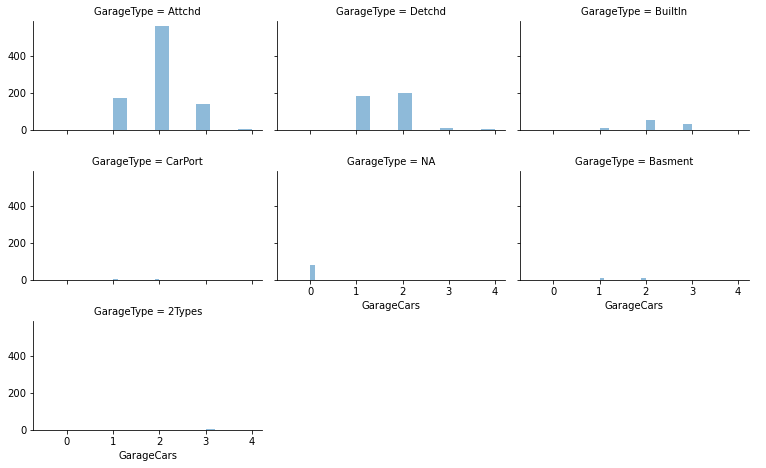

In [85]:
# test if fireplacess have a meaningful difference in price with/without 
grid = sns.FacetGrid(train_df, col='GarageType', height=2.2, aspect=1.6, col_wrap=3) 
grid.map(plt.hist, 'GarageCars', alpha=.5) 
grid.add_legend()

In [86]:
train_df.groupby(['GarageType'])['GarageCars'].describe()

,count,mean,std,min,25%,50%,75%,max
GarageType,,,,,,,,
2Types,6.0,3.000000,0.632456,2.0,3.0,3.0,3.0,4.0
Attchd,868.0,1.964286,0.599782,1.0,2.0,2.0,2.0,4.0
Basment,19.0,1.578947,0.507257,1.0,1.0,2.0,2.0,2.0
BuiltIn,88.0,2.250000,0.611198,1.0,2.0,2.0,3.0,3.0
CarPort,9.0,1.666667,0.500000,1.0,1.0,2.0,2.0,2.0
Detchd,387.0,1.576227,0.581452,1.0,1.0,2.0,2.0,4.0
NA,81.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


The average number of cars in a detached garage is approximately 1.6. This should be sufficient to replace the missing value with.

In [87]:
# fill missing values
test_df['GarageCars'].fillna(test_df.groupby(['GarageType'])['GarageCars'].transform(np.mean), inplace=True)

### KitchenQual

Kitchen quality

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

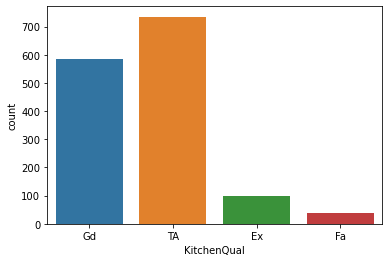

In [88]:
# training data
sns.countplot(x='KitchenQual', data=train_df)

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

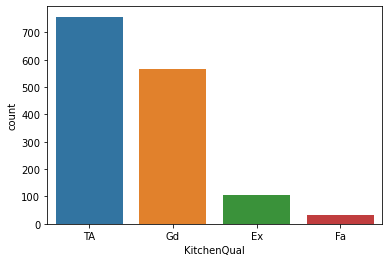

In [89]:
# testing data
sns.countplot(x='KitchenQual', data=test_df)

C:\Users\Jordan\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


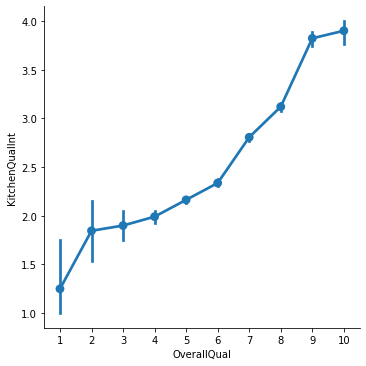

In [90]:
# convert kitchen quality to numeric value to test correlation
frames = [train_df, test_df]
comb_df = pd.concat(frames)

cats = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1 }

comb_df['KitchenQualInt'] = comb_df['KitchenQual'].map(cats)

sns.factorplot(x='OverallQual', y='KitchenQualInt', data=comb_df)


On average, the kitchen quality is correlated to the overall quality of the house. Depending on the missing value's OverallQual value, the KitchenQual value can be inferred.

In [91]:
test_df[test_df['KitchenQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,FireplaceBin
95,1556,50,RL,72.0,10632,IR1,Lvl,Inside,ClearCr,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,No,Unf,0.0,Unf,0.0,689.0,689.0,Gd,725,499,1224,0.0,1,1,3,NaN,6,Detchd,1917.0,Unf,1.0,180.0,0,0,248,1,2010,COD,Normal,0


With an overall quality of 5, the KitchenQual is likely TA (typical)

In [92]:
test_df.loc[95, 'KitchenQual'] = 'TA'

<AxesSubplot:>

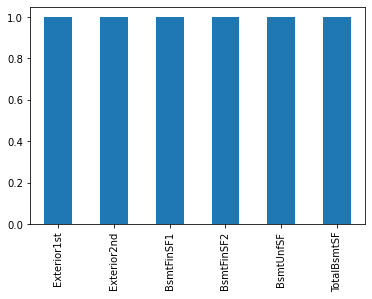

In [93]:
# testing set
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)
missing_test.plot.bar()

### TotalBsmtSF

In [94]:
test_df[test_df['TotalBsmtSF'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,FireplaceBin
660,2121,20,RM,99.0,5940,IR1,Lvl,FR3,BrkSide,Feedr,1Fam,1Story,4,7,1946,1950,Gable,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NaN,NA,NaN,NaN,NaN,TA,896,0,896,0.0,1,0,2,TA,4,Detchd,1946.0,Unf,1.0,280.0,0,0,0,4,2008,ConLD,Abnorml,0


In this case, one datapoint is missing Total Basement SF and is also missing BsmtFinSF1, BsmtFinType2, BsmtFinSF2, and BsmtUnfSF. This datapoint does not have a basement and thus all basement features can be filled in with NA/0.

In [95]:
data = [train_df, test_df]

for dataset in data:
    dataset['TotalBsmtSF'].fillna(0, inplace=True) # total SF of basement
    dataset['BsmtUnfSF'].fillna(0, inplace=True) # Unfinished square feet of basement area
    dataset['BsmtFinSF1'].fillna(0, inplace=True) # Type 1 finished square feet
    dataset['BsmtFinSF2'].fillna(0, inplace=True) # Type 2 finished square feet

### Exteriors

Exterior1st and Exterior2nd denote the exterior covering on house (the second is if there is a second material)

In [96]:
test_df[test_df['Exterior1st'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,FireplaceBin
691,2152,30,RL,85.0,19550,Reg,Lvl,Inside,Edwards,Norm,1Fam,1Story,5,7,1940,2007,Flat,NaN,NaN,None,0.0,TA,TA,PConc,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,Ex,1518,0,1518,1.0,1,0,2,Fa,5,NA,1940.0,NA,0.0,0.0,0,39,0,1,2008,WD,Normal,1


<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

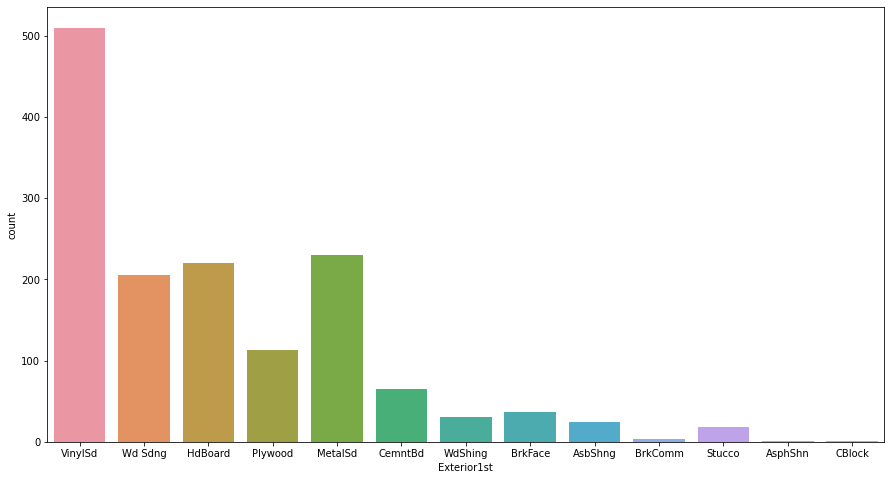

In [97]:
plt.figure(figsize=(15,8))
sns.countplot(x='Exterior1st', data=test_df)

<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

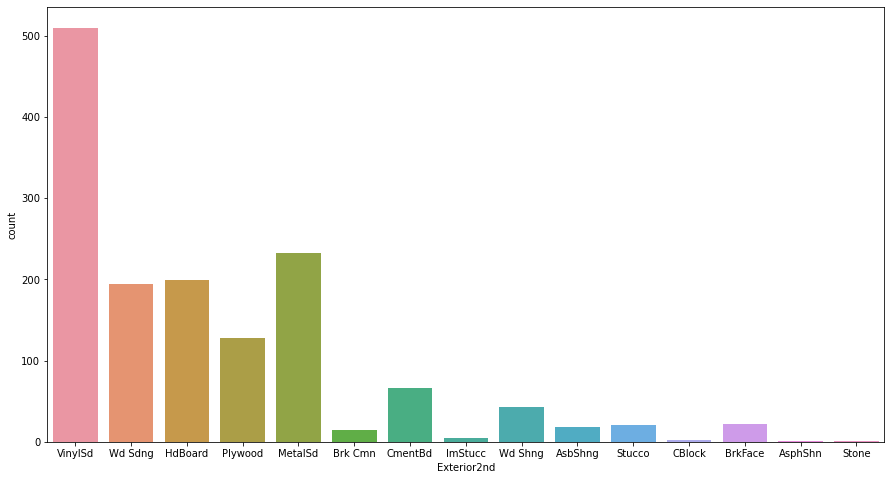

In [98]:
plt.figure(figsize=(15,8))
sns.countplot(x='Exterior2nd', data=test_df)

There aren't strong indicators to suggest what the siding would be when there are missing datapoints, so using the mode of the data would make the most sense.

In [99]:
data = [train_df, test_df]

for dataset in data:
    dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0], inplace=True)
    dataset['Exterior2nd'].fillna('NA', inplace=True)

In [100]:
#ensure there are no missing values in either dataset
print(train_df.isna().sum().sum(), test_df.isna().sum().sum())

0 0


### Feature Engineer

Now that all missing values are filled in, features can be engineered to attempt to add more value to the datasets. 

### YearRemodAdd

This feature notes when a house has been remodeled (if it has been remodeled). This data can be used to make a binary feature of whether the house has been remodeled or not to investigate a potential link between a home being remodeled and sales price.

In [115]:
# see what portion of properties have remodels
train_df[train_df['YearBuilt'] != train_df['YearRemodAdd']].shape, test_df[test_df['YearBuilt'] != test_df['YearRemodAdd']].shape

((695, 56), (663, 55))

Nearly one half of the properties have been remodeled after their initial build year. This is sufficient enough to suggest that the mentioned feature is warranted

In [116]:
for dataset in [train_df, test_df]:
    dataset['Remodeled'] = np.where(dataset['YearBuilt'] != dataset['YearRemodAdd'], "YES", "NO")

This variable slightly improved model performance. It will be kept as a feature.

### MoSold

<AxesSubplot:xlabel='MoSold', ylabel='count'>

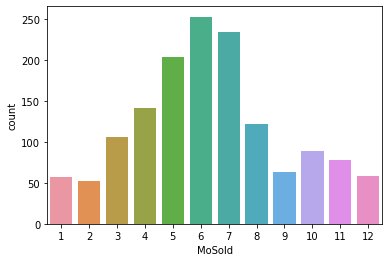

In [147]:
sns.countplot(x='MoSold', data=train_df)

In [160]:
# Create a dictionary to map months to seasons
months = {1: "WINTER", 2: "WINTER", 3: "SPRING", 4: "SPRING", 5: "SPRING", 6:"SUMMER", 
         7: "SUMMER", 8: "SUMMER", 9: "FALL", 10: "FALL", 11: "FALL", 12: "WINTER"}

for dataset in [train_df, test_df]:
    dataset['Season'] = dataset['MoSold'].map(months)
    dataset.drop(['MoSold'], axis=1, inplace=True) #Replace Month Sold with the season value 

### Encode features with dummy feature columns

In [161]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1458 non-null   int64  
 1   MSSubClass         1458 non-null   int64  
 2   MSZoning           1458 non-null   object 
 3   LotFrontage        1458 non-null   float64
 4   LotArea            1458 non-null   int64  
 5   LotShape           1458 non-null   object 
 6   LandContour        1458 non-null   object 
 7   LotConfig          1458 non-null   object 
 8   Neighborhood       1458 non-null   object 
 9   Condition1         1458 non-null   object 
 10  BldgType           1458 non-null   object 
 11  HouseStyle         1458 non-null   object 
 12  OverallQual        1458 non-null   int64  
 13  OverallCond        1458 non-null   int64  
 14  YearBuilt          1458 non-null   int64  
 15  YearRemodAdd       1458 non-null   int64  
 16  RoofStyle          1458 

In [162]:
feature_cols = ['MSZoning', 'LotShape', 'LandContour', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
                'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
                'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType',
                'GarageFinish', 'SaleType', 'SaleCondition', "Remodeled", "Season"]

# there are 25 feature columns in the dataset

In [163]:
# drop id from both datasets
# drop sale price from the training data
# store sale price in its own series
#Concatenate the datasets to be prepared for dummy-ing
for dataset in [train_df, test_df]:
    dataset.drop(['Id'],axis=1)
    

train_features = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice'].reset_index(drop=True)
test_features = test_df
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [164]:
# use the pandas get dummies method to create dummy columns for each feature
final_features = pd.get_dummies(all_features).reset_index(drop=True)

In [165]:
final_features.shape

(2917, 217)

In [166]:
# split dataframe back up

X = final_features.iloc[:len(y), :] #take the datapoints up to the index of the length of the salesprice series
X_sub = final_features.iloc[len(y):, :] #take the datapoints beyond those in dataframe X

# check shapes of X, y, and X_sub
X.shape, y.shape, X_sub.shape

((1458, 217), (1458,), (1459, 217))

### Make a Model and predict SalesPrice

In [167]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
X_sub_pred = classifier.predict(X_sub)

In [169]:
X_sub_pred

array([118705.35, 152698.19, 189362.19, ..., 172045.6 , 114748.71,
       221842.52], dtype=float32)

In [170]:
pred=pd.DataFrame(X_sub_pred)
sub_df=pd.read_csv('./kaggle_datasets/house_prices/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred], axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('./kaggle_datasets/house_prices/sample_submission.csv', index=False)

As of 10:33 PM EST on April 9th, 2021, this solution ranked in the top 62nd percentile and was ~85% accurate in estimating sale prices for the test dataset. This is before more advanced methods have been applied. I am not yet satisfied with this, but as a first venture into Kaggle competitions, I am happy to see that it worked. 